<a href="https://colab.research.google.com/github/JamKia/T-Test-and-Binomial-Distribution-for-Tossing-a-Coin/blob/main/T_Test_and_Binomial_Distribution_for_tossing_a_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4

Coin toss experiment can be thought of a **Binomial experiment**.

Probability of getting **HEAD** as success at each coin toss is **`p`**.

The number of experiments (tossing the coin) is counted by `n`.

In a binomial experiment, given `n` and `p`, we toss the coin `n` times and we are interested in the number of heads/successes we will get.

WE GET:

HEAD -> 1

TAIL -> 0

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
SEED = 3

In [3]:
np.random.seed(SEED)
n = 1 # We toss 1 time.
p = 0.5 # fair coin
np.random.binomial(n,p)

1

In [4]:
np.random.seed(SEED)
n = 10 # We toss 10 times.
p = 0.5 # fair coin
np.random.binomial(n, p)

5

Hence, with tossing 10 times and a fair coin we probably get 9 HEADs ($\frac{5}{10} \approx 50\%$ which is close to p=50%)

We repeat our coin toss experiment 100 times (in each experiment we toss a fair coin 10 times).

In [5]:
np.random.seed(SEED)
n = 10 # We toss 10 times in each experiment.
p = 0.5 # fair coin
size = 100 # let us repeat our experiment for 100 times
x100 = np.random.binomial(n=n, p=p, size=size)
x100

array([5, 6, 4, 5, 7, 7, 3, 4, 2, 5, 2, 5, 6, 4, 6, 5, 2, 5, 4, 5, 4, 6,
       5, 3, 5, 6, 4, 4, 5, 7, 8, 6, 7, 7, 5, 3, 6, 5, 4, 4, 5, 5, 4, 4,
       5, 7, 5, 4, 4, 5, 4, 4, 5, 3, 5, 4, 6, 6, 6, 6, 4, 6, 4, 5, 4, 5,
       3, 4, 8, 4, 6, 6, 6, 5, 5, 3, 3, 4, 3, 3, 3, 5, 4, 8, 6, 5, 6, 4,
       7, 7, 6, 5, 7, 6, 6, 7, 6, 4, 5, 4])

In [6]:
print('Standard Deviation of the Distribution:\t', np.std(x100) )
print('Mean of Distribution:\t\t\t', np.mean(x100) )

Standard Deviation of the Distribution:	 1.3444329659748753
Mean of Distribution:			 4.95


Now, I count how many times the coin lands 0 heads, 1 head, 2 heads with our fair coin toss, and so on.

In [7]:
experimens_list = [np.equal(x100,i).sum() for i in range(n+1)]
df = pd.DataFrame()
df['HEAD counts outcome'] = pd.Series(experimens_list)
df['HEAD counts'] = df.index
df['HEAD counts prob.'] = df['HEAD counts outcome']/df['HEAD counts outcome'].sum()
df

,HEAD counts outcome,HEAD counts,HEAD counts prob.
0,0,0,0.00
1,0,1,0.00
2,3,2,0.03
3,10,3,0.10
4,26,4,0.26
5,27,5,0.27
6,21,6,0.21
7,10,7,0.10
8,3,8,0.03
9,0,9,0.00


For 100 experiments, we may not see all heads or all tails with a fair coin (as the first and last elements are zero). There is more probability to get 4, or 5, or 6 heads in each experiment. The above success counts sums to 100, our total number of experiments. The observed successes is applied to estimate the probability of getting successes count for `n=10` tosses by dividing by 100.

[0.0, 0.0, 0.03, 0.1, 0.26, 0.27, 0.21, 0.1, 0.03, 0.0, 0.0]


Text(0, 0.5, 'Probability')

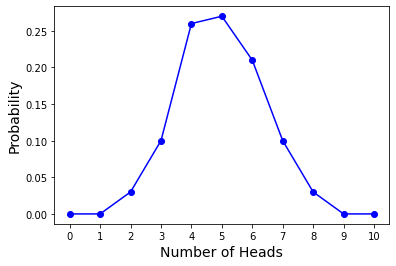

In [8]:
probs_100_mean = [np.equal(x100,i).mean() for i in range(n+1)]
print(probs_100_mean)

# plot for the probability of x successes
plt.xticks(range(n+1))
plt.plot(list(range(n+1)), probs_100_mean, color='blue', marker='o')
plt.xlabel('Number of Heads',fontsize=14)
plt.ylabel('Probability',fontsize=14)

For large n, the Binomial distribution $B(n, p)$ will converge to $N( np, np(1-p) )$

In [9]:
mean = n * p
var = n*p*(1-p)
mean, var

(5.0, 2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


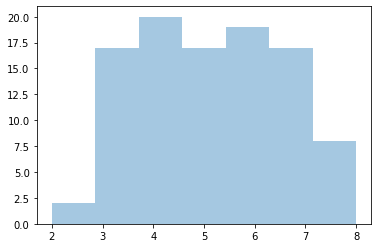

In [10]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

x = random.binomial(n=10, p=0.5, size=100)
sns.distplot(x, hist=True, kde=False)
plt.show()

For a fair coin the success rate is`p=0.5`. For the tossing count `n=10`, what is the probability that that the head counts is exactly 5? (CDF)

In [11]:
from scipy.stats import binom
#calculate binomial probability
binom.pmf(k=5, n=10, p=0.5)

0.24609375000000003

For a fair coin the success rate is`p=0.5`. For the tossing count `n=10`, what is the probability that the head counts is between 4 and 6 ? (CDF)

In [12]:
#calculate binomial probability
binom.cdf(k=6, n=10, p=0.5) - binom.cdf(k=4, n=10, p=0.5)

0.451171875

The probability that the coin lands on heads 5 times or fewer is:

In [13]:
#calculate binomial probability
binom.cdf(k=5, n=10, p=0.5)

0.623046875

And, for our experiment:

In [14]:
df[df['HEAD counts']<=5]['HEAD counts outcome'].sum()/100

0.66

What is the probability that the toss makes exactly 50%:

In [15]:
#calculate binomial probability
k = p * n
binom.pmf(k=k, n=10, p=0.5)

0.24609375000000003

What is the probability that the toss makes exactly 50% or 60%:

In [16]:
binom.pmf(k=k, n=10, p=0.5) + binom.pmf(k=6, n=10, p=0.5)

0.4511718749999999

And, for our experiment:

In [17]:
( df[df['HEAD counts']==5]['HEAD counts outcome'].values + df[df['HEAD counts']==6]['HEAD counts outcome'].values ) /100

array([0.48])

## Final Answer:

Two-tailed t-student test, t-student Critical Value, CI:

($H_0$: Coin is fair (Succes rate is not far enough from 50%))

In [18]:
alpha = 0.05 # the significance level
df = size - 1 # The degrees of freedom
t_critical = st.t.ppf(q = 1 - alpha/2 , df = df) #  if the test statistic is greater than this value, the results of the test are statistically significant.
t_score = (68/100 - p) * np.sqrt( size ) / np.std(x100)
pvalue = st.t.sf(abs(t_score), df= df)*2

# We find p-value for two-tailed test
if st.t.sf( abs(t_score), df = df) * 2 > alpha:
  print('t-score ({}) is less than t-student critical value ({}),\n the P-value ({}) is greater than the significance level (alpha)({}).\n Hence, we Fail to reject the null!.\nThe coin is fair.'.format(
                                                                                                          np.round(t_score,3),
                                                                                                          np.round(t_critical,3),
                                                                                                          np.round(pvalue,3),
                                                                                                          alpha)
                                                                                                         )
else:
  print('t-score ({}) is less than t-student critical value ({}),\n the P-value ({}) is greater than the significance level (alpha)({}).\n Hence, we reject the null! The coin is not fair.'.format(
                                                                                                          np.round(t_score,3),
                                                                                                          np.round(t_critical,3),
                                                                                                          np.round(pvalue,3),
                                                                                                          alpha)
                                                                                                         )

t-score (1.339) is less than t-student critical value (1.984),
 the P-value (0.184) is greater than the significance level (alpha)(0.05).
 Hence, we Fail to reject the null!.
The coin is fair.


In [114]:
alpha = 0.1 # the significance level
df = size - 1 # The degrees of freedom
t_critical = st.t.ppf(q = 1 - alpha/2 , df = df) #  if the test statistic is greater than this value, the results of the test are statistically significant.
t_score = (68/100 - p) * np.sqrt( size ) / np.std(x100)
pvalue = st.t.sf(abs(t_score), df= df)*2

# We find p-value for two-tailed test
if st.t.sf( abs(t_score), df = df) * 2 > alpha:
  print('t-score ({}) is less than t-student critical value ({}),\n the P-value ({}) is greater than the significance level (alpha)({}).\n Hence, we Fail to reject the null!.\nThe coin is fair.'.format(
                                                                                                          np.round(t_score,3),
                                                                                                          np.round(t_critical,3),
                                                                                                          np.round(pvalue,3),
                                                                                                          alpha)
                                                                                                         )
else:
  print('t-score ({}) is less than t-student critical value ({}),\n the P-value ({}) is greater than the significance level (alpha)({}).\n Hence, we reject the null! The coin is not fair.'.format(
                                                                                                          np.round(t_score,3),
                                                                                                          np.round(t_critical,3),
                                                                                                          np.round(pvalue,3),
                                                                                                          alpha)
                                                                                                        )

t-score (1.339) is less than t-student critical value (1.66),
 the P-value (0.184) is greater than the significance level (alpha)(0.1).
 Hence, we Fail to reject the null!.
The coin is fair.


In [115]:
frame = []
alpha = 0.05
step = 0.01
for success_rate in np.arange(0, 1+step, step):
  t_score = (success_rate - p) * np.sqrt( size ) / np.std(x100)
  pvalue = st.t.sf(abs(t_score), df= df)*2
  frame += [(success_rate, t_score, pvalue, t_critical, alpha, pvalue > alpha)]
test_df = pd.DataFrame.from_records(frame, columns = ['success_rate', 't_score', 'pvalue', 't_critical', 'alpha', 'pvalue > alpha'])
# test_df

In [116]:
minimum_success_rate = test_df[test_df['pvalue > alpha']== True]['success_rate'].min()
maximum_success_rate = test_df[test_df['pvalue > alpha']== True]['success_rate'].max()

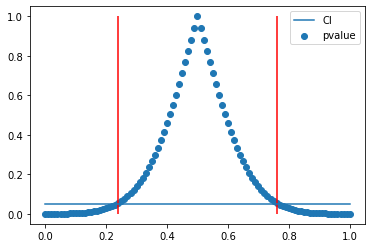

In [117]:
plt.scatter( test_df['success_rate'], test_df['pvalue'], label = 'pvalue')
plt.plot( test_df['success_rate'], test_df['alpha'], label = 'CI')
plt.vlines(minimum_success_rate, ymin = 0, ymax = 1, color = 'r')
plt.vlines(maximum_success_rate, ymin = 0, ymax = 1, color = 'r')
plt.legend()
plt.show()
# plt.scatter( test_df['success_rate'], abs( test_df['t_score']), label = 't-score' )
# plt.plot( test_df['success_rate'], abs( test_df['t_critical']), label = 'critical t' )
# plt.vlines(minimum_success_rate, ymin = 0, ymax = abs( test_df['t_score']).max(), color = 'r')
# plt.vlines(maximum_success_rate, ymin = 0, ymax = abs( test_df['t_score']).max(), color = 'r')
# plt.legend()
# plt.show()